In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('E-com_Data.csv')
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
data.shape

(541116, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
data = data[['CustomerID',
           'Item Code',
           'Date of purchase',
           'Price']]

In [6]:
data.head()

,CustomerID,Item Code,Date of purchase,Price
0,4355.0,15734,29-10-2017,1926.0
1,4352.0,14616,05-10-2017,1740.0
2,4352.0,14614,12-10-2017,1866.0
3,4352.0,85014B,22-08-2017,1869.0
4,4352.0,15364,10-10-2017,1888.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        404189 non-null  float64
 1   Item Code         537979 non-null  object 
 2   Date of purchase  537979 non-null  object 
 3   Price             537979 non-null  float64
dtypes: float64(2), object(2)
memory usage: 16.5+ MB


In [8]:
data.isna().sum()

CustomerID          136927
Item Code             3137
Date of purchase      3137
Price                 3137
dtype: int64

In [9]:
data.dropna(inplace= True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        404189 non-null  float64
 1   Item Code         404189 non-null  object 
 2   Date of purchase  404189 non-null  object 
 3   Price             404189 non-null  float64
dtypes: float64(2), object(2)
memory usage: 15.4+ MB


In [11]:
data['Date of purchase'] = pd.to_datetime(data['Date of purchase'])

In [12]:
data['CustomerID'] = data['CustomerID'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        404189 non-null  int32         
 1   Item Code         404189 non-null  object        
 2   Date of purchase  404189 non-null  datetime64[ns]
 3   Price             404189 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 13.9+ MB


In [14]:
#removing return entry
data = data[(data['Price'] >0)]

In [15]:
data.duplicated().sum()

19

In [16]:
data.drop_duplicates(inplace= True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395987 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        395987 non-null  int32         
 1   Item Code         395987 non-null  object        
 2   Date of purchase  395987 non-null  datetime64[ns]
 3   Price             395987 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 13.6+ MB


In [18]:
import datetime
max_date = data['Date of purchase'].max() + datetime.timedelta(days=1)
print(max_date)
rfm_data = data.groupby('CustomerID',group_keys = False).agg(Recency = ('Date of purchase', lambda x: (max_date - x.max()).days),
                                                 Monetory = ('Price',np.sum),
                                                 Frequency = ('Item Code', lambda x: x.nunique()))

2017-12-20 00:00:00


In [19]:
rfm_data

,Recency,Monetory,Frequency
CustomerID,,,
2,4,553704.0,103
3,77,257404.0,21
4,20,176613.0,72
5,18,41976.0,16
6,9,166972.0,57
...,...,...,...
4368,17,20480.0,10
4369,181,10774.0,7
4370,12,25177.0,12


In [20]:
rfm_data.describe()

,Recency,Monetory,Frequency
count,4324.000000,4.324000e+03,4324.000000
mean,61.943571,2.339783e+05,61.536540
std,89.154543,8.636522e+05,85.315774
min,1.000000,3.880000e+02,1.000000
25%,10.000000,3.928800e+04,16.000000
50%,20.000000,8.614700e+04,35.000000
75%,75.000000,2.108338e+05,77.250000
max,617.000000,3.553619e+07,1786.000000


## Using KMeans Clustering

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_data[['Recency','Monetory','Frequency']])

In [22]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,10):
    k_mean = KMeans(random_state= 42, n_clusters= i, init= 'k-means++', n_init= 10)
    k_mean.fit(X_scaled)
    sse.append(k_mean.inertia_)

Text(0, 0.5, 'CLusters')

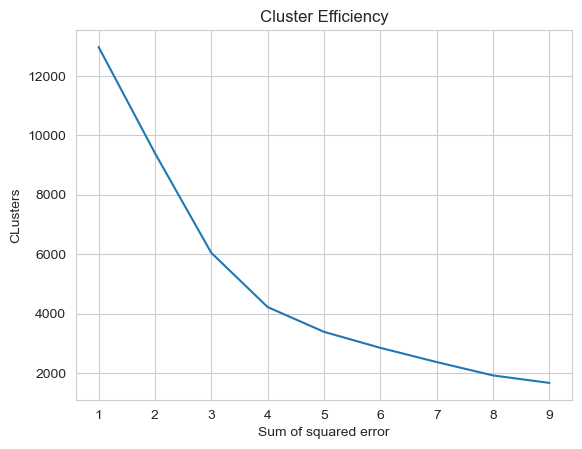

In [23]:
sns.set_style('whitegrid')
sns.lineplot(x = range(1,10), y= sse)
plt.title("Cluster Efficiency")
plt.xlabel("Sum of squared error")
plt.ylabel("CLusters")

- Basis above graph we can consider 4 or 5 cluster. However in this case we are considering 4

In [24]:
k_mean = KMeans(random_state=42, init='k-means++',n_clusters= 4)
k_mean.fit(X_scaled)
clusters = k_mean.predict(X_scaled)
clusters

array([3, 3, 3, ..., 3, 2, 3])

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhoute = silhouette_score(X_scaled, clusters)
silhoute

0.5702955863729307

In [26]:
davies_score = davies_bouldin_score(X_scaled, clusters)
davies_score

0.7097224640693909

In [27]:
rfm_data['score'] = clusters

In [28]:
rfm_data.head()

,Recency,Monetory,Frequency,score
CustomerID,,,,
2,4,553704.0,103,3
3,77,257404.0,21,3
4,20,176613.0,72,3
5,18,41976.0,16,3
6,9,166972.0,57,3


In [29]:
rfm_data[rfm_data['score'] == 3].describe()

,Recency,Monetory,Frequency,score
count,3105.000000,3.105000e+03,3105.000000,3105.0
mean,34.484380,1.314911e+05,40.449275,3.0
std,34.221052,1.621635e+05,30.006873,0.0
min,1.000000,7.340000e+02,1.000000,3.0
25%,10.000000,4.025800e+04,16.000000,3.0
50%,19.000000,7.919900e+04,32.000000,3.0
75%,50.000000,1.649280e+05,59.000000,3.0
max,151.000000,1.767931e+06,133.000000,3.0


In [1]:
def cluster_plot(data, score):
    cols = data.columns
    if len(cols) > 4:
        cols = data.columns[:len(cols)-2]
    else:
        cols = data.columns[:-1]
    plt.figure(figsize=(10,8), layout = 'tight')
    for i in range(len(cols)):
        plt.subplot(2,2,i+1)
        if i<len(cols)-1:
            sns.scatterplot(data=data, hue= score, x= cols[i], y= cols[i+1], palette='rainbow')

        else:
            sns.scatterplot(data=data, hue= score, x= cols[0], y= cols[2], palette='rainbow')
    plt.show()

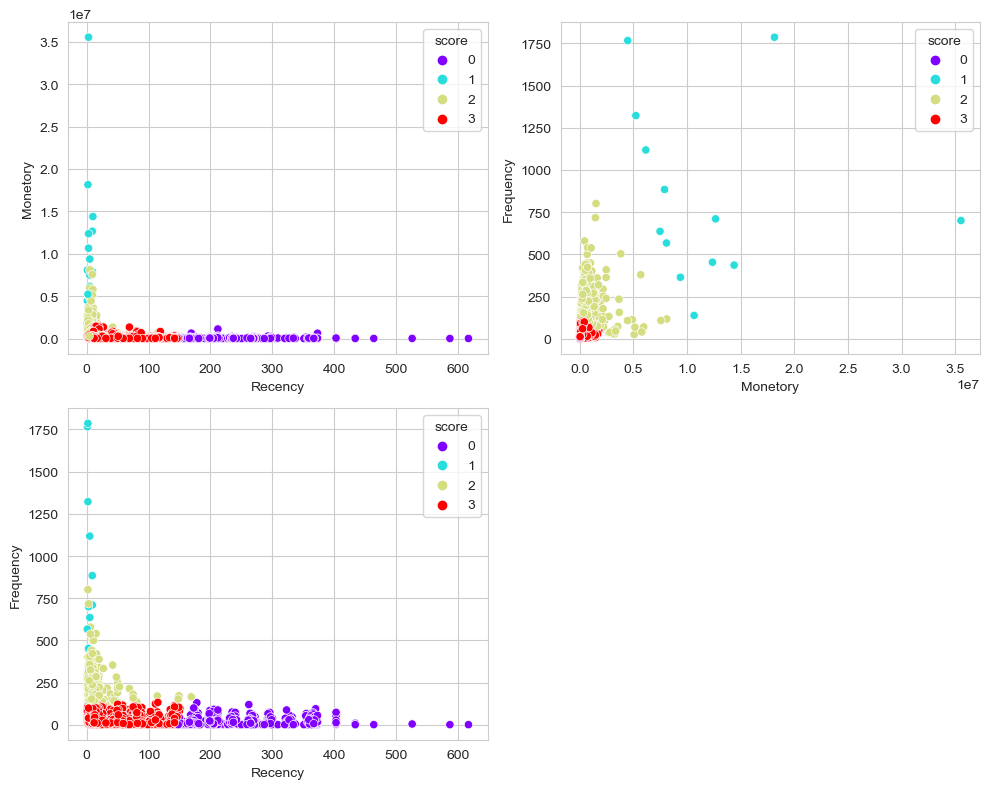

In [31]:
cluster_plot(rfm_data, score='score')

## Using Dendogram

In [32]:
def plot_dendrogram(model, **kwargs):
    """
    plot: Linkage Matrix and count of samples under each node
    """
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Load sample dataset


# Fit the AgglomerativeClustering model with 4 clusters
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X_scaled)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
model1 = AgglomerativeClustering(n_clusters=4)
cluster1 = model1.fit_predict(X_scaled)
silhoute = silhouette_score(X_scaled, cluster1)
silhoute 

In [ ]:
davies_score = davies_bouldin_score(X_scaled, cluster1)
davies_score

In [ ]:
rfm_data['dendo_score'] = cluster1

In [ ]:
rfm_data['dendo_score'].unique()

In [ ]:
cluster_plot(rfm_data, score='dendo_score')